# MMAI 894 - Exercise 2
## Convolutional artificial neural network : Image classification
The goal of this excercise is to show you how to create your first neural network using the tensorflow/keras library. We will be using the MNIST dataset.

Submission instructions:
- You cannot edit this notebook directly. Save a copy to your drive, and make sure to identify yourself in the title using name and student number
- Do not insert new cells before the final one (titled "Further exploration") 
- Select File -> Download as .py (important! not as ipynb)
- Rename the file: `studentID_lastname_firstname_ex2.py`
- Notebook must be able to _restart and run all_
- The mark will be assessed on the implementation of the functions with #TODO
- **Do not change anything outside the functions**  unless in the further exploration section
- The mark is primarily based on correctness. However, as you are encouraged to explore the architecture, meeting high performance is required.

- Do not use any additional libraries than the ones listed below (you may import additional modules from those libraries if needed)

In [ ]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# For windows laptops add following 2 lines:
# import matplotlib
# matplotlib.use('agg')

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten, MaxPooling2D


### Data preparation

#### Import data

In [ ]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()

In [ ]:
raw_X.shape


(70000, 784)

## Consider the following
- Same as excercise 1
- what shape should x be for a convolutional network?

In [ ]:
def clean_data(raw_X, raw_Y):
    # TODO: clean and QA raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    
    # X transformation
    cleaned_X = raw_X / 255
    cleaned_X = cleaned_X.reshape(-1,28,28,1)

    # Y transformation
    cleaned_Y = keras.utils.to_categorical(raw_Y)
   
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

In [ ]:
cleaned_X.shape
#cleaned_Y
#clean_data(raw_X, raw_Y)

(70000, 28, 28, 1)

#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You can use scikit-learn's train_test_split function.

In [ ]:
def split_data(cleaned_X, cleaned_Y):
    # TODO: split the data
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    # Split into training, and val+test
    X_train, X_test, Y_train, Y_test = train_test_split(cleaned_X, cleaned_Y, train_size=0.5)
    # Split into val and test
    X_val, X_test, Y_val, Y_test = train_test_split(X_train, Y_train, train_size=0.4)


    
    return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)

In [ ]:
print('Train Shape: ', X_train.shape)
print('Val shape:   ', X_val.shape)
print('Test shape:  ', X_test.shape)


Train Shape:  (35000, 28, 28, 1)
Val shape:    (14000, 28, 28, 1)
Test shape:   (21000, 28, 28, 1)


### Model

#### Neural network structure

This time, the exact model architecture is left to you to explore.  
Keep the number of parameters below 2,000,000

In [ ]:
def build_model():
    # TODO: build the model, 
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    input_shape = [28,28,1]
    model = Sequential()
    #Convolution Layer
    model.add(Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', input_shape=[28,28,1]))
    #Pooling Layer
    model.add(MaxPool2D(pool_size=2, strides=2))

    #2nd Convolution Layer
    model.add(Conv2D(filters=128, padding='same', kernel_size=3,activation='relu'))
    model.add(Conv2D(filters=128, padding='same', kernel_size=3,activation='relu'))
    model.add(MaxPool2D(pool_size=2, strides=2))

    #Flatterning layer
    model.add(Flatten())

    #Full Connection
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))

    #Output Layer
    model.add(Dense(units=10, activation='softmax'))
    
    return model
    
#model = build_model()


def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

#model = compile_model(model)

def train_model(model, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    batch_size = 128
    epochs = 12
    history = model.fit(X_train, Y_train, batch_size=batch_size, verbose=1, epochs=epochs, validation_data=(X_val, Y_val))
    return model, history
#model, history = train_model(model, X_train, Y_train, X_val, Y_val)
 

def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    score = model.evaluate(X_test, Y_test, verbose=0)
    #print('\nPerformance on test set:')
    #print('Test Loss: ', score[0])
    #print('Test Accuracy: ', score[1])

    test_loss = score[0]
    test_accuracy = score[1]
  
    return test_loss, test_accuracy
  

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)             

In [ ]:
## You may use this space (and add additional cells for exploration)

model = build_model()
model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)
test_loss, test_accuracy = eval_model(model, X_test, Y_test)

print('\nPerformance on test set:')
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_accuracy)

Epoch 1/12
274/274 [==============================] - 4s 13ms/step - loss: 0.9182 - accuracy: 0.6849 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 2/12
274/274 [==============================] - 3s 12ms/step - loss: 0.1606 - accuracy: 0.9551 - val_loss: 0.0478 - val_accuracy: 0.9875
Epoch 3/12
274/274 [==============================] - 3s 12ms/step - loss: 0.1044 - accuracy: 0.9705 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 4/12
274/274 [==============================] - 3s 12ms/step - loss: 0.0805 - accuracy: 0.9789 - val_loss: 0.0229 - val_accuracy: 0.9933
Epoch 5/12
274/274 [==============================] - 3s 12ms/step - loss: 0.0634 - accuracy: 0.9830 - val_loss: 0.0189 - val_accuracy: 0.9946
Epoch 6/12
274/274 [==============================] - 3s 12ms/step - loss: 0.0525 - accuracy: 0.9854 - val_loss: 0.0171 - val_accuracy: 0.9948
Epoch 7/12
274/274 [==============================] - 3s 12ms/step - loss: 0.0530 - accuracy: 0.9865 - val_loss: 0.0103 - val_accuracy: 0.9972

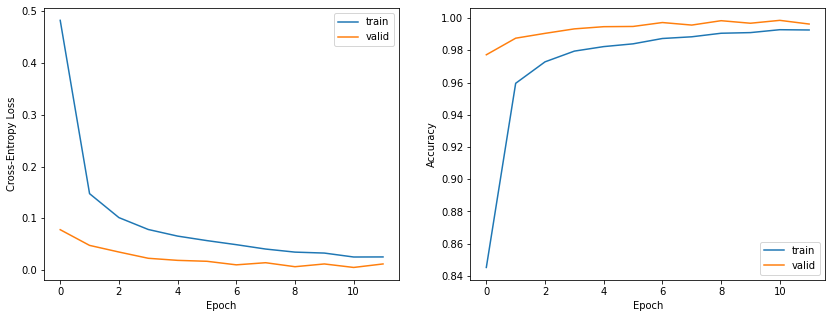

In [ ]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



A few incorrectly classified images:


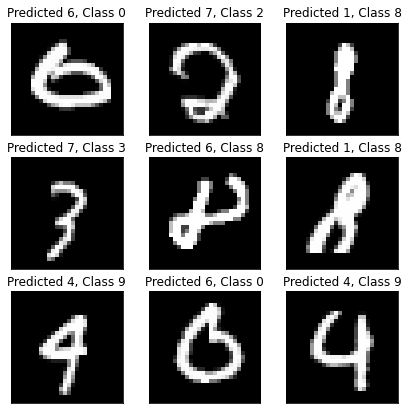

In [ ]:
#incorrect prediction images
import numpy as np

predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == Y_test.argmax(axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test.argmax(axis=-1))[0]
print('\nA few incorrectly classified images:')    
plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])

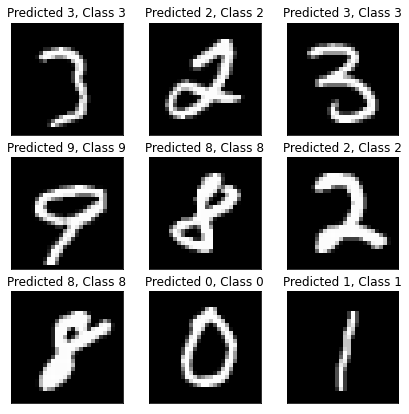

In [ ]:
#correct image prediction
plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])